In [1]:
import mesa
from epstein_network_civil_violence.agent import Inhabitant, Police
from epstein_network_civil_violence.model import EpsteinNetworkCivilViolence
import numpy as np
import matplotlib.pyplot as plt
from SALib.sample import saltelli
from SALib.analyze import sobol
import random

C:\Users\liaojw\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [5]:
# define problem
problem = {
    'num_vars': 3,
    'names': ['alpha', 'jail_factor', 'incitation_threshold'],
    'bounds': [[0, 1], [0, 1.2], [10, 100]]
}

num_samples = 2**9

# generate samples
param_values = saltelli.sample(problem, num_samples)

# define the model function
print("Configuration number：", param_values.shape[0])
results = []
for i in range(param_values.shape[0]):

    alpha = param_values[i, 0]
    jail_factor = param_values[i, 1]
    incitation_threshold = int(param_values[i, 2])

    model = EpsteinNetworkCivilViolence(
        width=20,
        height=20,
        citizen_density=0.7,
        cop_density=0.05,
        citizen_vision=4,
        cop_vision=3,
        legitimacy=0.82,
        max_jail_term=30,
        active_threshold=0.1,
        arrest_prob_constant=2.3,
        movement=True,
        max_iters=100010,
        # alpha=0.1,
        # jail_factor=1,
        legitimacy_impact=0.01,
        # incitation_threshold=10,
        alpha=alpha,
        jail_factor=jail_factor,
        impact_chance=0.5,
        # legitimacy_impact=legitimacy_impact,
        incitation_threshold=incitation_threshold
    )

    active_num = 0
    for s in range(300):
        model.step()
        if s>=100:
            active_num += model.count_type_citizens(model, "Active")

    results.append(active_num)

Y = np.array(results)

# calculate sensitivity index
Si = sobol.analyze(problem, Y, print_to_console=True)

print('First-order sensitivity index:', Si['S1'])
print('Total order sensitivity index:', Si['ST'])

C:\Users\liaojw\AppData\Local\Temp\ipykernel_51532\2282513309.py:11: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5.1 Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem, num_samples)


Configuration number： 4096
Outburst ends at step 9
Outburst starts, wait time recorded: 1
Outburst ends at step 11
Outburst starts, wait time recorded: 1
Outburst ends at step 13
Outburst starts, wait time recorded: 1
Outburst ends at step 15
Outburst ends at step 35
Outburst starts, wait time recorded: 1
Outburst ends at step 37
Outburst starts, wait time recorded: 1
Outburst ends at step 39
Outburst starts, wait time recorded: 1
Outburst ends at step 41
Outburst starts, wait time recorded: 1
Outburst ends at step 43
Outburst starts, wait time recorded: 1
Outburst ends at step 47
Outburst starts, wait time recorded: 1
Outburst ends at step 49
Outburst starts, wait time recorded: 1
Outburst ends at step 51
Outburst starts, wait time recorded: 1
Outburst ends at step 53
Outburst starts, wait time recorded: 1
Outburst ends at step 55
Outburst starts, wait time recorded: 1
Outburst ends at step 57
Outburst starts, wait time recorded: 1
Outburst ends at step 59
Outburst starts, wait time r

C:\Users\liaojw\AppData\Roaming\Python\Python311\site-packages\SALib\util\__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


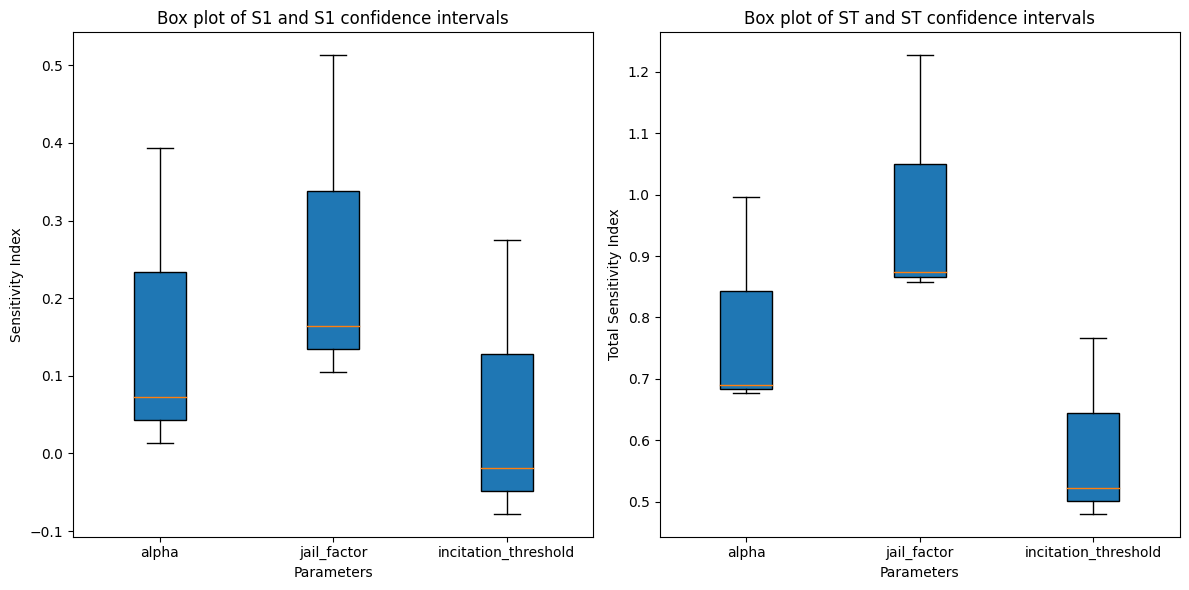

In [7]:
# prepare the data
S1 = Si['S1']
S1_conf = Si['S1_conf']
ST = Si['ST']
ST_conf = Si['ST_conf']

# draw box plots of S1 and ST
plt.figure(figsize=(12, 6))

# S1 box plot
plt.subplot(1, 2, 1)
plt.boxplot([S1, S1 + S1_conf, S1 - S1_conf], vert=True, patch_artist=True, labels=problem['names'])
plt.title('Box plot of S1 and S1 confidence intervals')
plt.xlabel('Parameters')
plt.ylabel('Sensitivity Index')

# ST box plot
plt.subplot(1, 2, 2)
plt.boxplot([ST, ST + ST_conf, ST - ST_conf], vert=True, patch_artist=True, labels=problem['names'])
plt.title('Box plot of ST and ST confidence intervals')
plt.xlabel('Parameters')
plt.ylabel('Total Sensitivity Index')

plt.tight_layout()
plt.show()

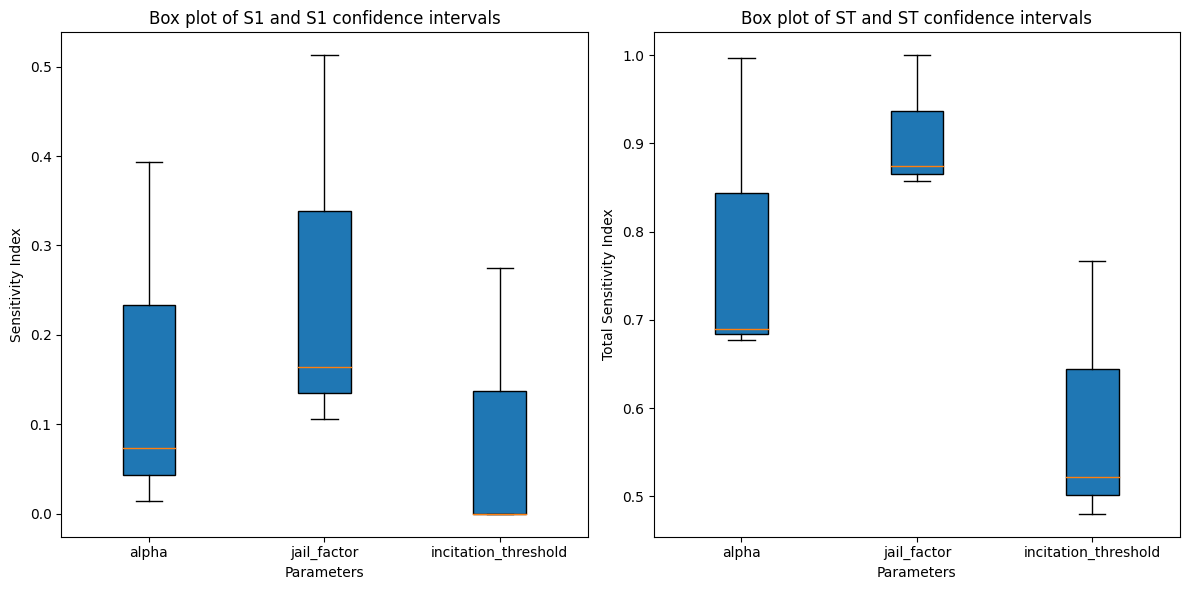

In [11]:
# draw box plots of S1 and ST
plt.figure(figsize=(12, 6))

# S1 box plot
plt.subplot(1, 2, 1)
plt.boxplot([S1, np.clip(S1 + S1_conf, 0, 1), np.clip(S1 - S1_conf, 0, 1)], vert=True, patch_artist=True, labels=problem['names'])
plt.title('Box plot of S1 and S1 confidence intervals')
plt.xlabel('Parameters')
plt.ylabel('Sensitivity Index')

# ST box plot
plt.subplot(1, 2, 2)
plt.boxplot([ST, np.clip(ST + ST_conf, 0, 1), np.clip(ST - ST_conf, 0, 1)], vert=True, patch_artist=True, labels=problem['names'])
plt.title('Box plot of ST and ST confidence intervals')
plt.xlabel('Parameters')
plt.ylabel('Total Sensitivity Index')

plt.tight_layout()
plt.show()